<a href="https://colab.research.google.com/github/AdrianoHKim/Soulcode/blob/main/notebooks/2_2_cap_instalada_de_geracao_eletrica_por_fonte_mw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Projeto Final**
Escola: SoulCode Academy

Curso: Bootcamp Analista de Dados - Martech - AD2

**Alunos: Adriano Kim, José Aurelio, Marcos Paulo, Paulo Vitorino e Renato Costa e Wesley Luiz**

Professores: Douglas Ribeiro, Franciane Rodrigues e Jonathas Carneiro

# Base de Dados Informações gerais
A Empresa de Pesquisa Energética (EPE) apresenta o Anuário Estatístico de Energia Elétrica, que traz as informações relativas à cadeia de energia elétrica do Brasil, bem como informações regionais e das unidades federativas.

Este Anuário resulta da compilação de dados dos anos de 2013 a 2022, coletados e consolidados pela EPE ao longo de 2023. Cumpre ressaltar que os dados apresentados não contemplam a parcela consumida em unidades autoprodutoras de energia elétrica.Realizado no âmbito da Comissão Permanente de Análise e Acompanhamento do Mercado de Energia Elétrica (COPAM), sob a coordenação da EPE.

Os dados relativos à capacidade instalada e geração de energia elétrica são obtidos pelo sistema de informações de geração da Associação Nacional de Energia Elétrica(ANEEL) e pelo Balanço Energético Nacional (BEN).

Fonte: https://dashboard.epe.gov.br/apps/anuario-livro/


## **Dicionário de dados**

* ano - Ano referente a coleta dos registros
* grupo - Cada fonte de energia presente na pesquisa e o total de capacidade de todas fontes ao ano
* total - Total de capacidade instalada de cada fonte energetica em MW(Megawatt)




# Extração
A primeira etapa da ETL é a extração dos dados de sua fonte original. Dependendo do tipo de dados e da fonte, você pode precisar de diferentes ferramentas e técnicas para extrair os dados.

## Instalações de Bibliotecas
Instalações e importações das bibliotecas necessárias para o processo de ETL.

In [ ]:
!pip install gcsfs

In [ ]:
!pip install pandera

In [ ]:
# Importando Bibliotecas pré instaladas
import os
import pandas as pd
import numpy as np
import pandera as pa
from google.cloud import storage
from google.colab import drive

In [ ]:
# Ignorando alguns alertas desnecessários
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Configuração da quantidade de colunas para aparecer em um DataFrame
pd.set_option('display.max_columns',100)

In [ ]:
# Conexão com a conta do Google Cloud
serviceAccount = '/content/projeto-final-ad2-e8-ae566c3a2c2b.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

In [ ]:
# Conexão com a bucket do Google Cloud

client = storage.Client()
bucket = client.get_bucket('projeto-final-ad2-e8')
bucket.blob('2_2_cap_instalada_de_geracao_eletrica_por_fonte_mw.xlsx')
path = 'gs://projeto-final-ad2-e8/dados/brutos/excel/2_2_cap_instalada_de_geracao_eletrica_por_fonte_mw.xlsx'


In [ ]:
# Leitura e configuração dos arquivos extraidos
df_2_2 = pd.read_excel(path)

## Pré Análise

In [ ]:
# Visualização geral
df_2_2

,ano,grupo,total
0,2013,Biomassa,11449.195087
1,2013,CGH,266.387413
2,2013,Carvão,3389.465000
3,2013,Derivados de Petróleo,7515.175863
4,2013,Gás Natural,12300.288650
...,...,...,...
115,2018,Total,162840.079840
116,2019,Total,170118.022150
117,2020,Total,174736.512910
118,2021,Total,181609.727950


In [ ]:
# Visualização de forma aleatoria
df_2_2.sample(3)

,ano,grupo,total
15,2014,Gás Natural,12550.00000
50,2017,PCH,5019.57477
11,2014,Biomassa,12183.09200


In [ ]:
# Tamanho total de (linhas , colunas)
df_2_2.shape

(120, 3)

In [ ]:
# Todos os tipos de dados presentes
df_2_2.dtypes

ano        int64
grupo     object
total    float64
dtype: object

In [ ]:
# Contagem de observações para cada coluna
df_2_2.count()

ano      120
grupo    120
total    120
dtype: int64

In [ ]:
# Informações detalhadas
df_2_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ano     120 non-null    int64  
 1   grupo   120 non-null    object 
 2   total   120 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.9+ KB


In [ ]:
# Backup local
df_2_2 = df_2_2.copy()

In [ ]:
# Fazendo um relatório para mostrar os valores únicos de cada atributo.
# O for vai garantir que a atividade seja feita automaticamentepara todos os atributos

for coluna in df_2_2:
    valor = (df_2_2[coluna].unique())
    print("-"*70)
    msg = f"Valores únicos para o atributo {coluna}:"
    print(f"{msg:^70}")
    print("-"*70)
    print(f"\n{valor}\n")
    print("-"*70)


----------------------------------------------------------------------
                 Valores únicos para o atributo ano:                  
----------------------------------------------------------------------

[2013 2014 2015 2016 2017 2018 2019 2020 2021 2022]

----------------------------------------------------------------------
----------------------------------------------------------------------
                Valores únicos para o atributo grupo:                 
----------------------------------------------------------------------

['Biomassa' 'CGH' 'Carvão' 'Derivados de Petróleo' 'Gás Natural' 'Outras'
 'PCH' 'Solar' 'Usinas Eólicas' 'Usinas Hidrelétricas' 'Usinas Nucleares'
 'Total']

----------------------------------------------------------------------
----------------------------------------------------------------------
                Valores únicos para o atributo total:                 
----------------------------------------------------------------------

[1.1

In [ ]:
df_2_2.ano

0      2013
1      2013
2      2013
3      2013
4      2013
       ... 
115    2018
116    2019
117    2020
118    2021
119    2022
Name: ano, Length: 120, dtype: int64

# Transformação
Aqui os dados extraídos precisam ser transformados em um formato adequado para análise, e para isso deve seguir alguns passos, que podem precisar serem repetidos ao longo do processo de análise.

## Limpeza de Dados
Remover dados duplicados, corrigir erros de digitação, tratar dados inconsistentes etc.

In [ ]:
# Verificar se há valores duplicados
df_2_2.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
115    False
116    False
117    False
118    False
119    False
Length: 120, dtype: bool

In [ ]:
# Verificar se há valores nulos/ausentes
df_2_2.isnull().sum()

ano      0
grupo    0
total    0
dtype: int64

In [ ]:
df_2_2_backup = df_2_2.copy()

## Normalização de Dados
Colocar os dados em um formato padronizado para facilitar a análise.

### Tipagem

In [ ]:
# Como alterar data ano
df_2_2_backup['ano'] = pd.to_datetime(df_2_2_backup['ano'], format='%Y')

In [ ]:
df_2_2_backup.ano

0     2013-01-01
1     2013-01-01
2     2013-01-01
3     2013-01-01
4     2013-01-01
         ...    
115   2018-01-01
116   2019-01-01
117   2020-01-01
118   2021-01-01
119   2022-01-01
Name: ano, Length: 120, dtype: datetime64[ns]

In [ ]:
df_2_2_backup.dtypes

ano      datetime64[ns]
grupo            object
total           float64
dtype: object

In [ ]:
# Examinando alteração
df_2_2_backup.dtypes

ano      datetime64[ns]
grupo            object
total           float64
dtype: object

## **Qualidade e integridade dos dados**

### **Validação da estrutura dos dados (schema)**

In [ ]:
df_2_2.count()

ano      120
grupo    120
total    120
dtype: int64

In [ ]:
df_2_2_backup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ano     120 non-null    datetime64[ns]
 1   grupo   120 non-null    object        
 2   total   120 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 2.9+ KB


In [ ]:
# Definindo o esquema de validação e o examinando
schema = pa.DataFrameSchema({
    'ano': pa.Column(pa.DateTime),
    'grupo': pa.Column(pa.String),
    'total': pa.Column(pa.Float)
})

schema.validate(df_2_2_backup)

,ano,grupo,total
0,2013-01-01,Biomassa,11449.195087
1,2013-01-01,CGH,266.387413
2,2013-01-01,Carvão,3389.465000
3,2013-01-01,Derivados de Petróleo,7515.175863
4,2013-01-01,Gás Natural,12300.288650
...,...,...,...
115,2018-01-01,Total,162840.079840
116,2019-01-01,Total,170118.022150
117,2020-01-01,Total,174736.512910
118,2021-01-01,Total,181609.727950


## **Colunas Persistidas**

* ano
* grupo
* total

## Backup - Copia de segurança

In [ ]:
# Backup para analise
df_2_2_tratado = df_2_2_backup.copy()

# Carregamento
Depois que os dados são extraídos e transformados adequadamente, eles estarão prontos para as análise, mas antes disso eles precisam ser carregados em um local de armazenamento adequado. Podendo ser um banco de dados SQL ou NoSQL, um sistema de armazenamento em nuvem, e para o caso de disponibilizar o projeto publicamente é ideal que ele seja colocar em uma pasta de datasets, diferenciando o arquivo bruto e o tratado.

In [ ]:
# Upando para o Google Cloud

df_2_2_tratado.to_excel('gs://projeto-final-ad2-e8/dados/tratados/dataset_tratados_xlsx/2_2_cap_instalada_de_geracao_eletrica_por_fonte_mw.xlsx', index=False)


# Análise exploratória de dados.
- Descrição de dados: identificação dos tipos de variáveis, dimensões dos dados, valores extremos e estatísticas descritivas.
- Visualização dos dados: criação de gráficos, tabelas e outros tipos de visualização para entender a distribuição e a relação entre as variáveis.
- Identificação de padrões: identificação de padrões, tendências, correlações e outras relações entre as variáveis.
- Testes estatísticos: aplicação de testes estatísticos para confirmar ou refutar hipóteses sobre os dados.

## Instalações de bibliotecas
bibliotecas necessárias para a análise de dados que não haviam sido importadas anteriormente.

## **Estatisticas**

In [ ]:
# Resumo de estatisticas descritivas
df_2_2_backup.describe().round(2)

,total
count,120.00
mean,26456.58
std,47604.88
min,5.00
25%,2181.87
50%,5587.53
75%,14758.54
max,189126.59


In [ ]:
# Correlações de todas colunas quantitativas
df_2_2_backup.corr()

,total
total,1.0


### Filtros e agrupamentos
Criar novas variáveis com base nos dados originais para permitir uma análise mais detalhada e avançada.

In [ ]:
filtro_2_2_Total = df_2_2_backup.loc[df_2_2_backup.grupo == 'Total']
filtro_2_2_Total

,ano,grupo,total
110,2013-01-01,Total,126743.000000
111,2014-01-01,Total,133912.838000
112,2015-01-01,Total,140858.092568
113,2016-01-01,Total,150337.577160
114,2017-01-01,Total,157112.175860
115,2018-01-01,Total,162840.079840
116,2019-01-01,Total,170118.022150
117,2020-01-01,Total,174736.512910
118,2021-01-01,Total,181609.727950
119,2022-01-01,Total,189126.593530


In [ ]:
filtro_2_2_sem_total = df_2_2_backup.loc[df_2_2_backup.grupo != 'Total']
filtro_2_2_sem_total

,ano,grupo,total
0,2013-01-01,Biomassa,11449.195087
1,2013-01-01,CGH,266.387413
2,2013-01-01,Carvão,3389.465000
3,2013-01-01,Derivados de Petróleo,7515.175863
4,2013-01-01,Gás Natural,12300.288650
...,...,...,...
105,2022-01-01,PCH,5662.018570
106,2022-01-01,Solar,7387.110870
107,2022-01-01,Usinas Eólicas,23744.123860
108,2022-01-01,Usinas Hidrelétricas,103195.357000


In [ ]:
filtro_2_2_sem_total[['grupo', 'total']]

,grupo,total
0,Biomassa,11449.195087
1,CGH,266.387413
2,Carvão,3389.465000
3,Derivados de Petróleo,7515.175863
4,Gás Natural,12300.288650
...,...,...
105,PCH,5662.018570
106,Solar,7387.110870
107,Usinas Eólicas,23744.123860
108,Usinas Hidrelétricas,103195.357000


In [ ]:
filtro_2_2_sem_total.loc[:,['ano', 'grupo']]

,ano,grupo
0,2013-01-01,Biomassa
1,2013-01-01,CGH
2,2013-01-01,Carvão
3,2013-01-01,Derivados de Petróleo
4,2013-01-01,Gás Natural
...,...,...
105,2022-01-01,PCH
106,2022-01-01,Solar
107,2022-01-01,Usinas Eólicas
108,2022-01-01,Usinas Hidrelétricas


In [ ]:
# Quantidade de registros para cada grupo
df_2_2_backup.groupby('grupo')['total'].mean().sort_values(ascending=False)

grupo
Total                    158739.461997
Usinas Hidrelétricas      94826.566534
Biomassa                  14101.295956
Gás Natural               13855.010616
Usinas Eólicas            12854.442838
Derivados de Petróleo      7963.079034
PCH                        5130.946094
Carvão                     3257.530000
Outras                     2100.204987
Solar                      2057.791581
Usinas Nucleares           1990.000000
CGH                         602.594357
Name: total, dtype: float64

In [ ]:
# Examinando a comparação de algumas estatisticas
estatisticas_usinas = df_2_2_backup.groupby(['grupo']).agg({'total': ['mean', 'median', 'count', 'sum']})
estatisticas_usinas.round(2)

total                             
                            mean     median count         sum
grupo                                                        
Biomassa                14101.30   14428.67    10   141012.96
CGH                       602.59     644.48    10     6025.94
Carvão                   3257.53    3275.74    10    32575.30
Derivados de Petróleo    7963.08    7682.69    10    79630.79
Gás Natural             13855.01   13169.81    10   138550.11
Outras                   2100.20    2193.56    10    21002.05
PCH                      5130.95    5088.48    10    51309.46
Solar                    2057.79    1366.45    10    20577.92
Total                  158739.46  159976.13    10  1587394.62
Usinas Eólicas          12854.44   13336.77    10   128544.43
Usinas Hidrelétricas    94826.57   96474.43    10   948265.67
Usinas Nucleares         1990.00    1990.00    10    19900.00

# Visualização

In [ ]:
!pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt

<Figure size 1000x600 with 0 Axes>

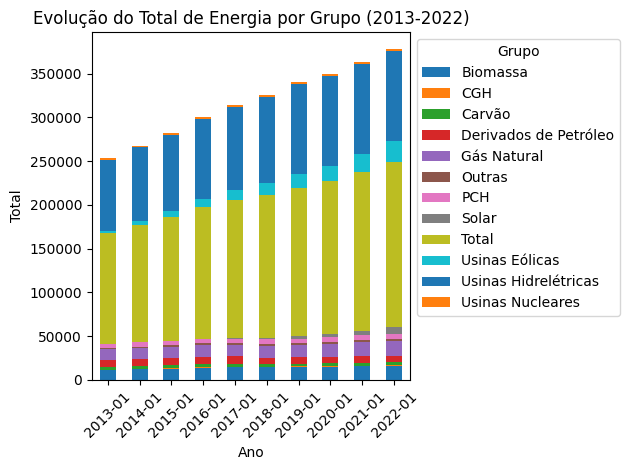

In [ ]:
# Pivotar os dados
pivot_df = df_2_2_tratado.pivot_table(index='ano', columns='grupo', values='total')

# Criar um gráfico de barras diretamente do DataFrame pivotado
plt.figure(figsize=(10, 6))

ax = pivot_df.plot(kind='bar', stacked=True)

# Formate os rótulos do eixo x para exibir apenas ano e mês
labels = [item.get_text()[:7] for item in ax.get_xticklabels()]
ax.set_xticklabels(labels)

plt.xlabel('Ano')
plt.ylabel('Total')
plt.title('Evolução do Total de Energia por Grupo (2013-2022)')
plt.legend(title='Grupo', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.tight_layout()

# Exiba o gráfico
plt.show()